In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Numerical Integration
### Using Python to "integrate" the differential equations and numerically find/approximate a solution.
### (A very useful tool for evaluating and using differential equation models of dynamic systems!)

In [2]:
from scipy.integrate import solve_ivp

In [3]:
# define the function on the right-hand side of the differential equation, dy/dt = f(t,y)
def dydt(t,y):
    return -y*np.sin(t)  # an example with both t and y dependence

#def dydt(t,y):
#    return 0.5*y*(1-y/10)  # the logistic model example

In [4]:
# y0 = y(t_0) initial condition
y0 = [1]

# start at t_0 and integrate until the second value
tspan = [0, 15]

In [5]:
# This version is the bare minimum, but might give you a choppy-looking result.
#sol = solve_ivp(dydt,tspan,y0)

# This version forces the solver to use smaller time steps, so the result may be smoother and more accurate.
sol = solve_ivp(dydt,tspan,y0,max_step=0.1)

# This version allows you to control the output time steps -- solve_ivp will use smaller steps to construct the solution, but it will specifically output y(t) at exactly the t_eval values.  Useful if you want to work with results after specific time intervals.
#sol = solve_ivp(dydt,tspan,y0,t_eval=[0,5,10,15,20])

### Output "sol" is like a filing cabinet with multiple folders of information/data in it.  We want the folders that hold the "t" values and the "y" values.
The dimensions of the two lists are a little weird, so we use ".T" to swap rows and columns in the "y" variable so that the dimensions match for plotting.

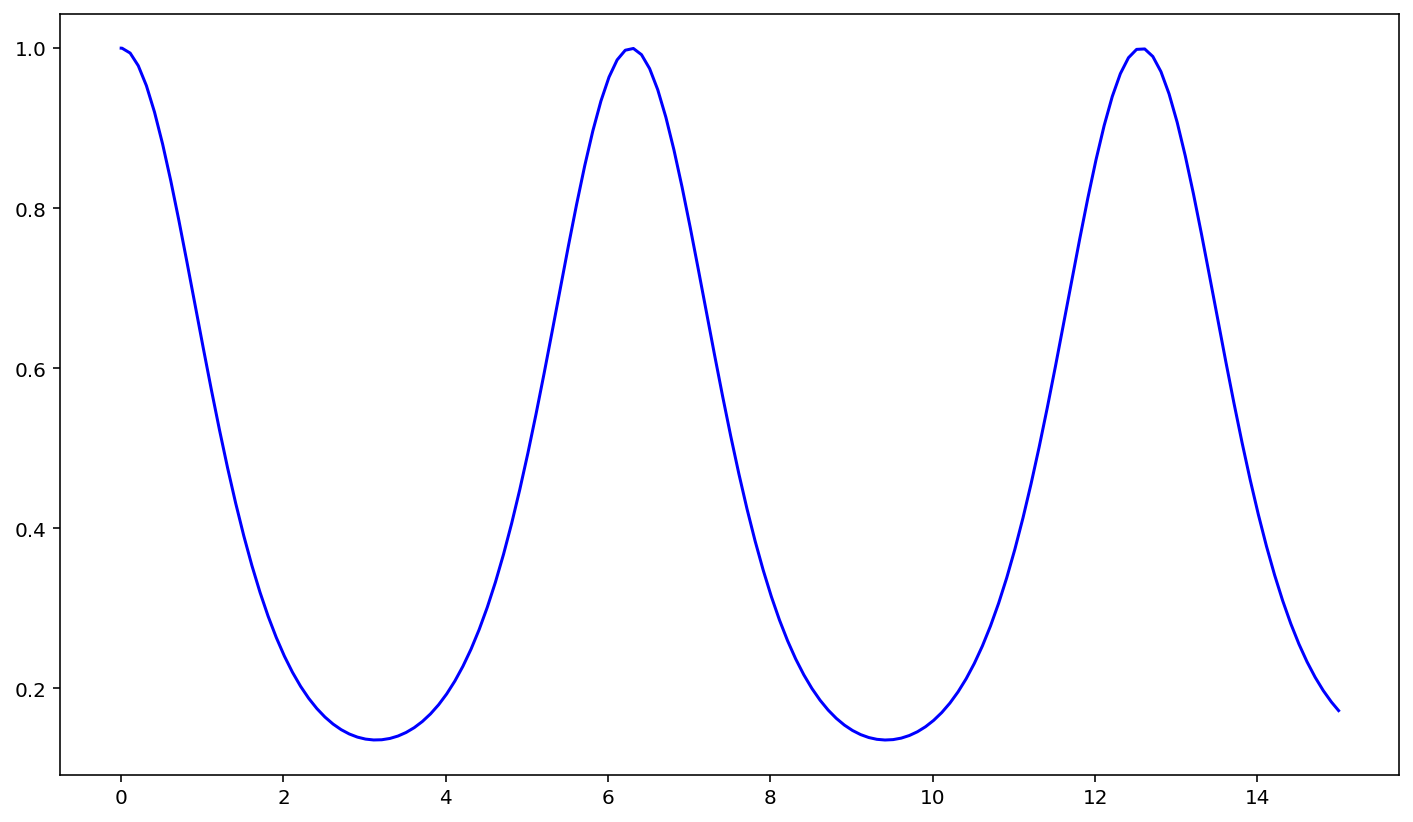

In [6]:
plt.plot(sol.t,sol.y.T,'b')

## Numerical Integration for Systems
### This works the same way as above, but now a list/array for any variable that relates to "y".

In [7]:
# holds dy1/dt = f(t,y1,y2), dy2/dt = g(t,y1,y2) but beware the indexing (y1 = y[0] and y2 = y[1] because of 0-indexing)
def dydt(t,y):
    return [ y[0]*(3-2*y[0]-y[1]), y[1]*(3-y[0]-2*y[1]) ]

In [8]:
y0 = [0.5, 0.25]  # y1(t_0), y2(t_0) initial conditions
tspan = [0, 10]  # start at t_0 and go until the second value

In [9]:
sol = solve_ivp(dydt,tspan,y0,max_step=0.1)  # see options above

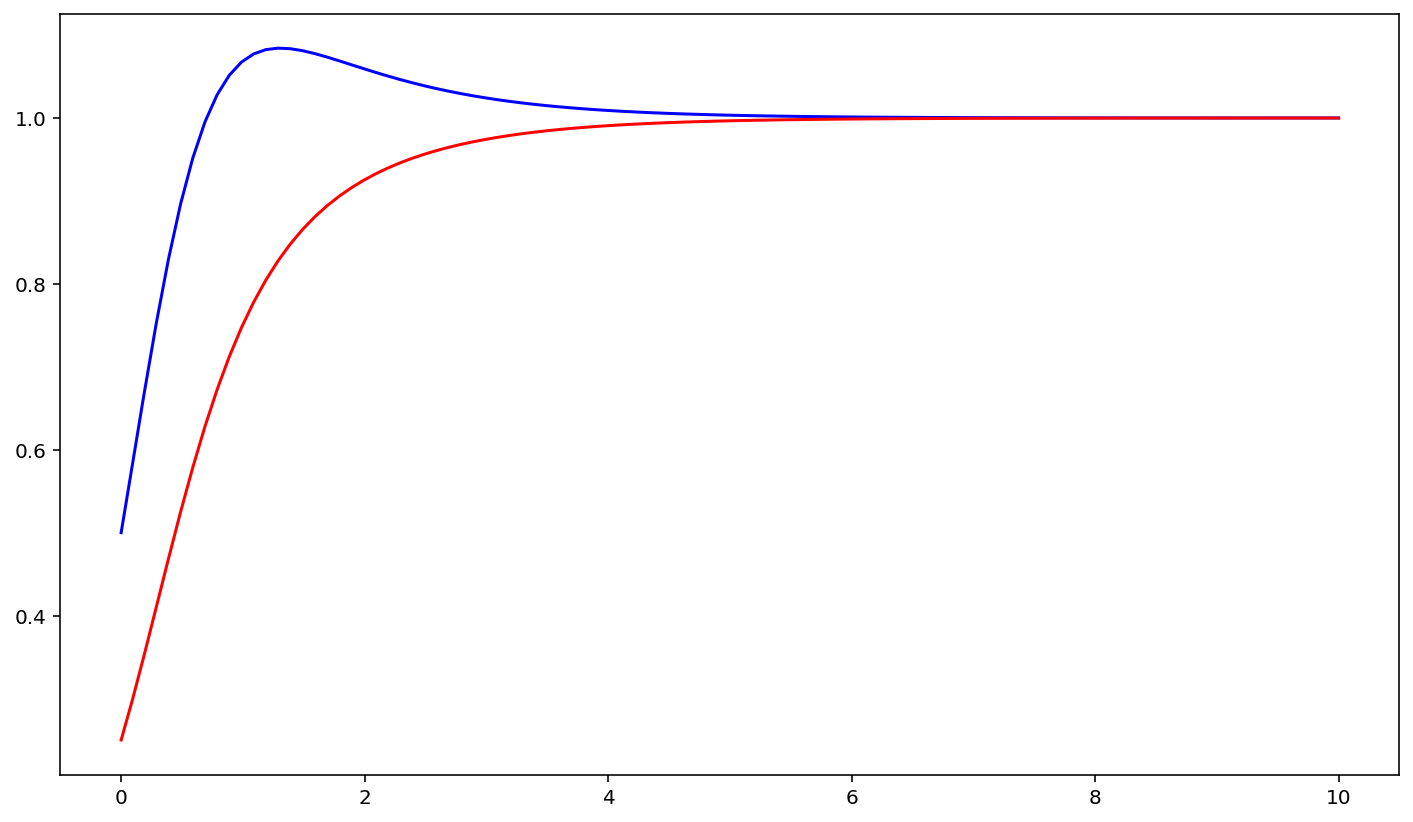

In [10]:
# notice that we're now plotting y1 (blue) and y2 (red) by taking the appropriate parts of the "y" folder in "sol"
plt.plot(sol.t,sol.y[0].T,'b',sol.t,sol.y[1].T,'r')